this notebook is pretty much the same as v1 but I'm reducing the number of observations in the positive class

In [1]:
#imports
from fastai.vision.all  import *
from pathlib import Path
import pandas as pd

# data

In [2]:
!ls ../../../data/kickoffs

kickoff_returns_v1		kickoff_returns_v2_frame_sub60
kickoff_returns_v2_frame_sub10	kickoff_returns_v2_frame_sub70
kickoff_returns_v2_frame_sub20	kickoff_returns_v2_frame_sub80
kickoff_returns_v2_frame_sub30	kickoff_returns_v2_frame_sub90
kickoff_returns_v2_frame_sub40	plays.csv
kickoff_returns_v2_frame_sub50	v1


In [3]:
# import cv2
# im = cv2.imread('kickoffs/v1/2018090900_1992.png')
# print('width: ', im.shape[1])
# print('height:', im.shape[0])

In [3]:
data_path = '../../../data/kickoffs/'
plays = pd.read_csv(data_path + 'plays.csv'); plays.head(2)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,"J.Elliott kicks 65 yards from PHI 35 to end zone, Touchback.",1,0,0,PHI,Kickoff,Touchback,44966.0,...,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Center-R.Lovato. J.Hardy to ATL 41 for 5 yards (K.Grugier-Hill). PENALTY on PHI-S.Gibson, Unsportsmanlike Conduct, 15 yards, enforced at ATL 41.",1,4,4,PHI,Punt,Return,45603.0,...,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18


,gameId,playId
145,2018090903,4162
445,2018091601,4214
767,2018091613,3464
768,2018091613,3731
795,2018091700,4233
...,...,...
19161,2020122500,4187
19449,2020122710,4234
19586,2021010300,4494
19679,2021010304,3985


In [4]:
df = plays.query('specialTeamsPlayType == "Kickoff" & specialTeamsResult == "Return"')[['gameId', 'playId', 'playResult']]
df['fname'] = df.apply(lambda row: str(row.gameId) + '_' + str(row.playId) + '.png', axis=1)
df['label'] = df.apply(lambda row: 1 if int(row.playResult) < 30 else 0 , axis=1)
df.head(3)

,gameId,playId,playResult,fname,label
3,2018090600,677,34,2018090600_677.png,0
9,2018090600,1606,60,2018090600_1606.png,0
24,2018090900,36,45,2018090900_36.png,0


In [5]:
df2 = df[['fname', 'label']]; df2.head(3)

,fname,label
3,2018090600_677.png,0
9,2018090600_1606.png,0
24,2018090900_36.png,0


In [6]:
sum(df2['label'])

405

In [7]:
len(df2)

2921

In [8]:
p = Path(data_path)
dls_sub10 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub10'), bs=32)
dls_sub20 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub20'), bs=32)
dls_sub30 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub30'), bs=32)
dls_sub40 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub40'), bs=32)
dls_sub50 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub50'), bs=32)
dls_sub60 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub60'), bs=32)
dls_sub70 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub70'), bs=32)
dls_sub80 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub80'), bs=32)
dls_sub90 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub90'), bs=32)

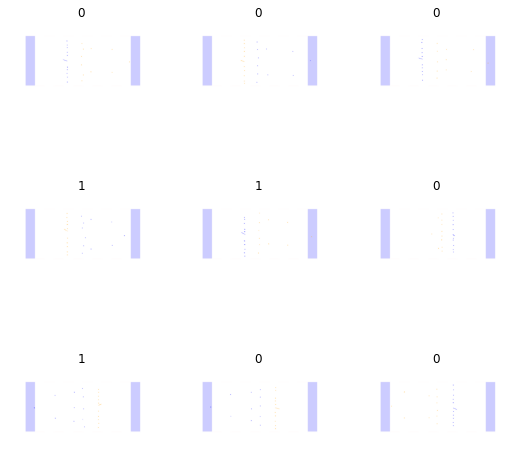

In [9]:
dls_sub10.show_batch()

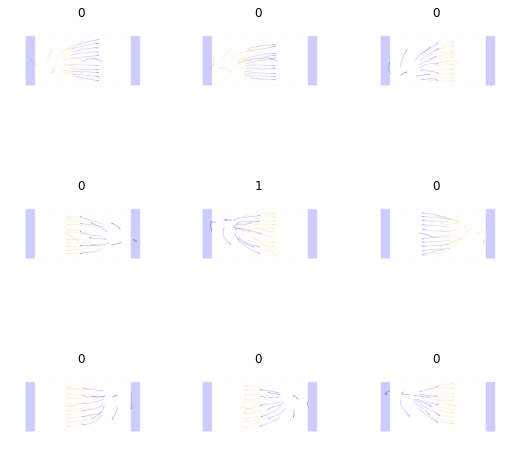

In [10]:
dls_sub50.show_batch()

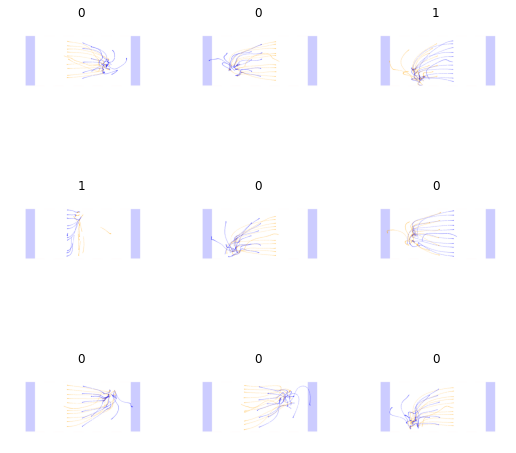

In [11]:
dls_sub90.show_batch()

# modeling - 30 frames

SuggestedLRs(valley=0.0020892962347716093)

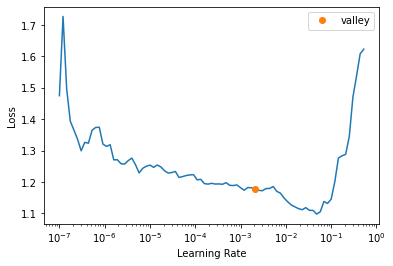

In [15]:
# learn3 = cnn_learner(dls_sub30, resnet34, metrics=error_rate); learn3.lr_find()

In [24]:
# learn3.fine_tune(12, 0.0020892962347716093)

epoch,train_loss,valid_loss,error_rate,time
0,0.886852,0.389138,0.111301,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.549481,9.026910,0.888699,01:01
1,0.457627,19.585054,0.888699,01:01
2,0.432898,1.031981,0.111301,01:01
3,0.409916,0.361933,0.095890,01:01
4,0.351593,0.411559,0.077055,01:00
5,0.284792,0.403168,0.116438,01:01
6,0.203622,0.640160,0.229452,01:01
7,0.113383,0.485112,0.073630,01:01
8,0.063035,0.470109,0.075342,01:01
9,0.036306,0.516497,0.070205,01:00


SuggestedLRs(valley=0.0020892962347716093)

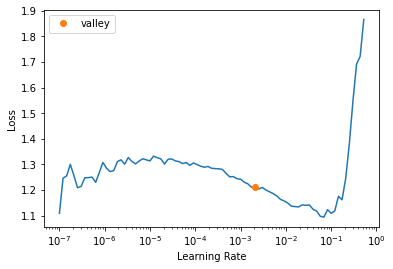

In [12]:
learn3 = cnn_learner(dls_sub30, resnet34, metrics=error_rate); learn3.lr_find()

In [13]:
learn3.fine_tune(6, 0.0020892962347716093)

epoch,train_loss,valid_loss,error_rate,time
0,0.889429,0.525251,0.220890,00:47


epoch,train_loss,valid_loss,error_rate,time
0,0.526341,0.518607,0.142123,01:01
1,0.463645,1.153595,0.583904,01:00
2,0.413979,1.056946,0.143836,01:00
3,0.333545,0.411280,0.097603,01:00
4,0.233574,0.367137,0.109589,01:00
5,0.148495,0.350519,0.099315,01:00


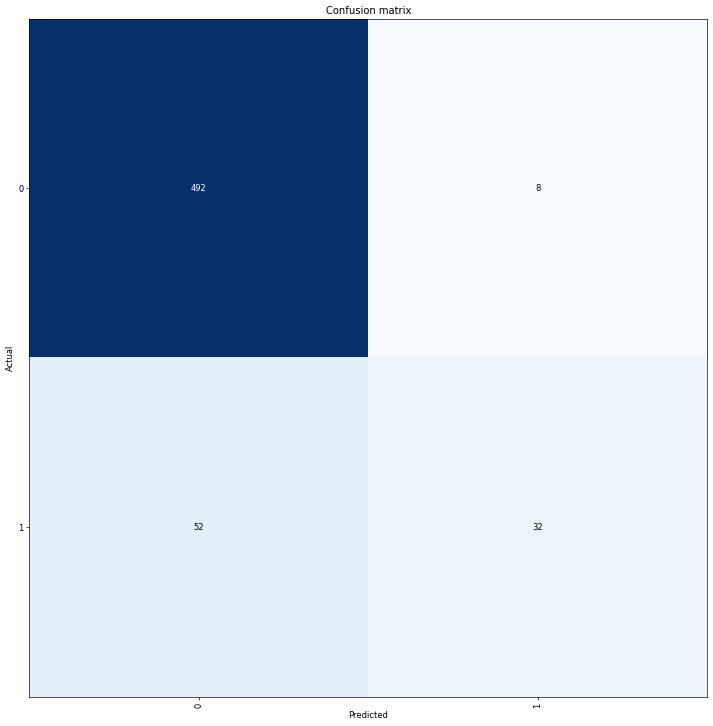

In [20]:
interp = ClassificationInterpretation.from_learner(learn3)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [36]:
interp.print_classification_report()

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       500
           1       0.80      0.38      0.52        84

    accuracy                           0.90       584
   macro avg       0.85      0.68      0.73       584
weighted avg       0.89      0.90      0.88       584



# look at predictions

In [103]:
imgs, probs, classes, clas_idx = learn3.get_preds(dl=learn3.dls.valid, with_input=True, with_decoded=True)

In [122]:
pd.set_option('display.max_rows', 10)
df3 = pd.DataFrame(learn3.dls.valid.items)
df3['prediction'] = [int(o) for o in clas_idx]
df3

,fname,label,prediction
370,2018091300_565.png,0,0
2712,2018102107_926.png,0,0
4473,2018112501_4473.png,0,0
1998,2018100710_4640.png,1,1
1645,2018093012_4226.png,0,0
...,...,...,...
19278,2020122704_482.png,0,0
19449,2020122710_4234.png,1,1
13199,2019122907_528.png,0,0
3704,2018111102_2003.png,0,0


In [123]:
df3.label.sum()

84

In [124]:
df3.prediction.sum()

40

In [126]:
df3_pos_corr_predicted = df3[(df3['label']==1) & (df3['prediction'])]

In [127]:
df3_pos_corr_predicted

,fname,label,prediction
1998,2018100710_4640.png,1,1
19978,2021010315_4182.png,1,1
6784,2018123014_4253.png,1,1
2306,2018101406_4443.png,1,1
16116,2020110100_2624.png,1,1
...,...,...,...
5758,2018121603_4526.png,1,1
3448,2018110405_3539.png,1,1
4081,2018111802_4588.png,1,1
18082,2020120605_4199.png,1,1


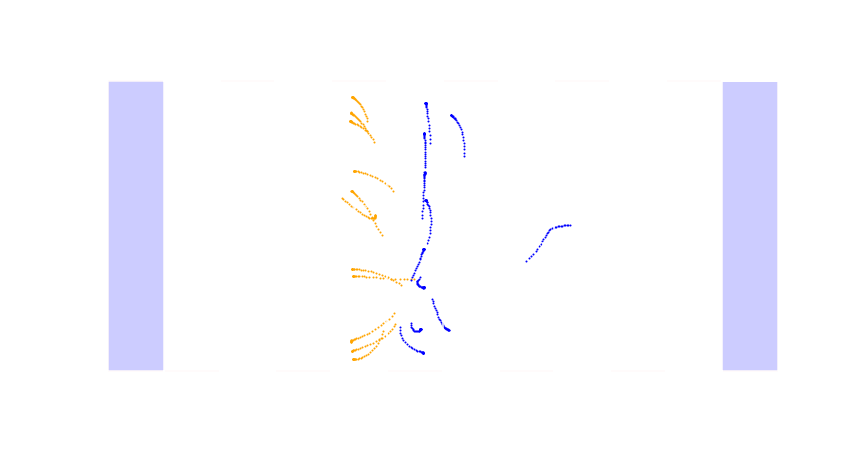

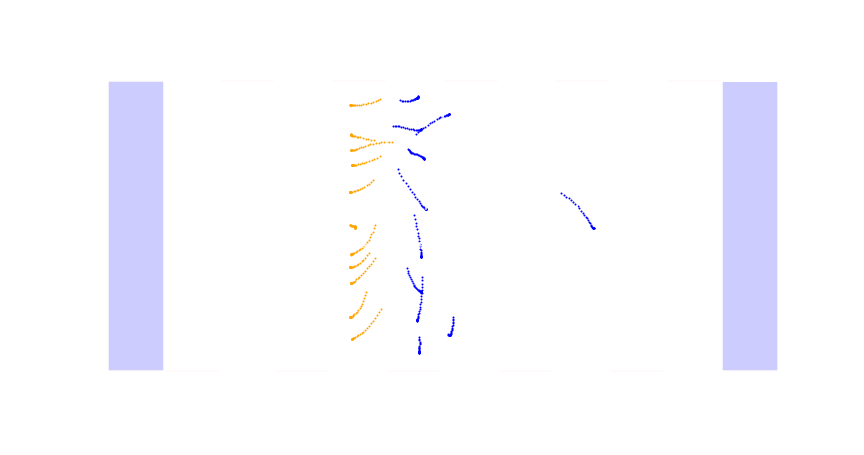

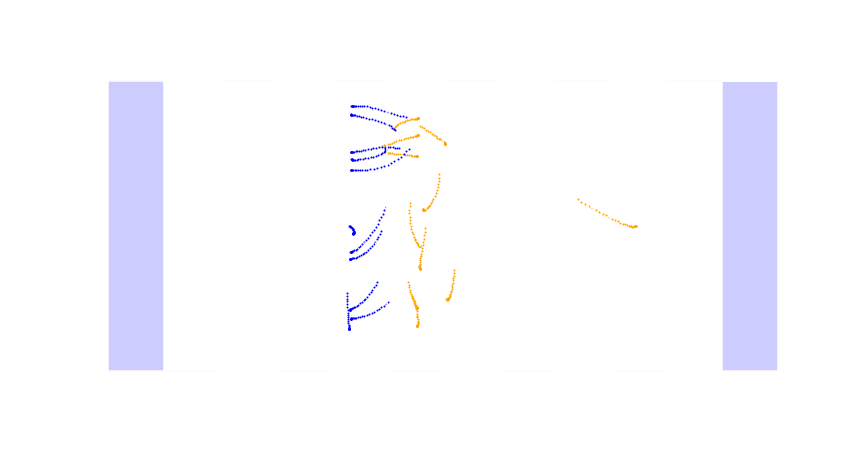

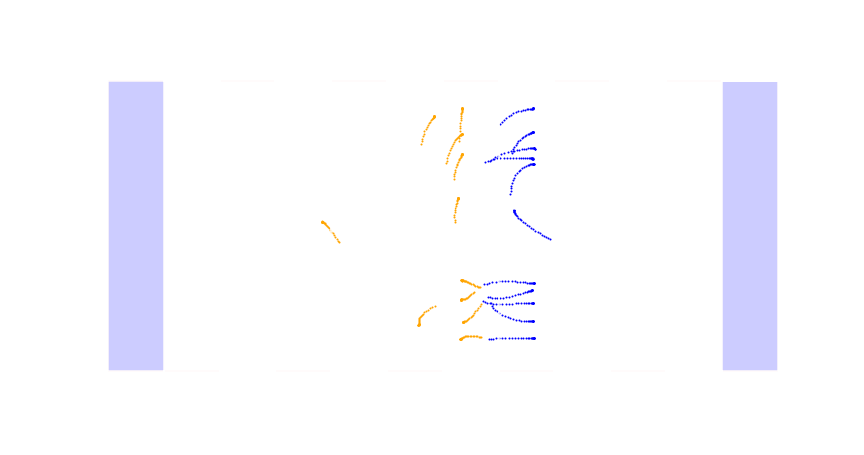

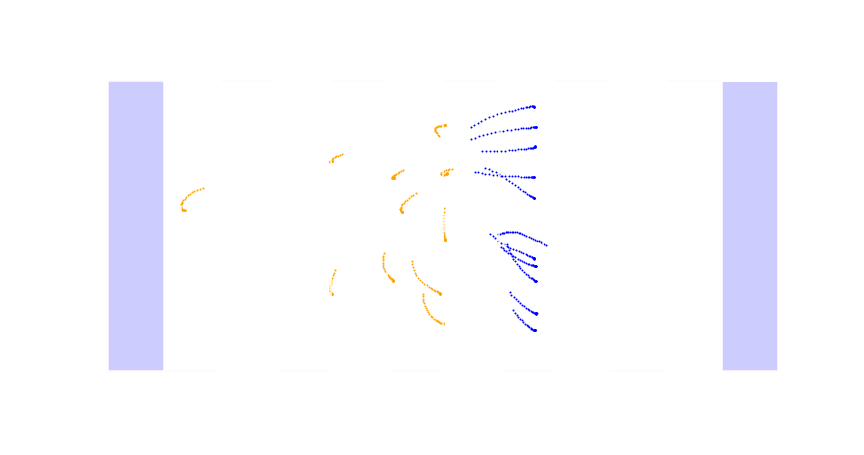

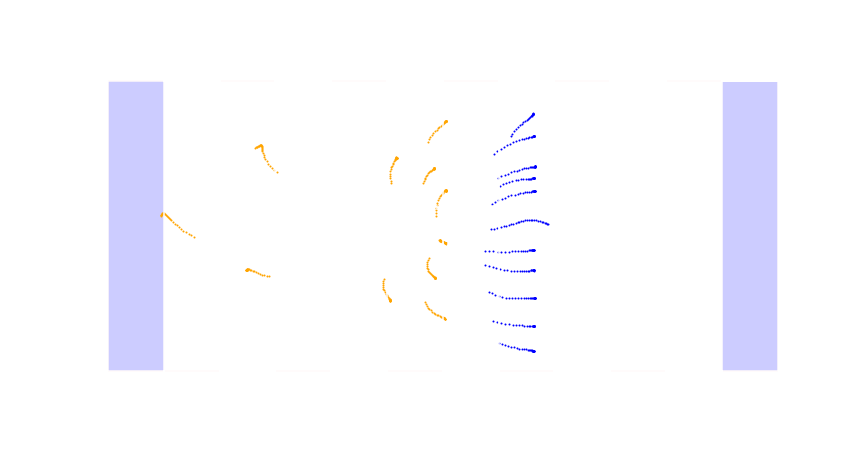

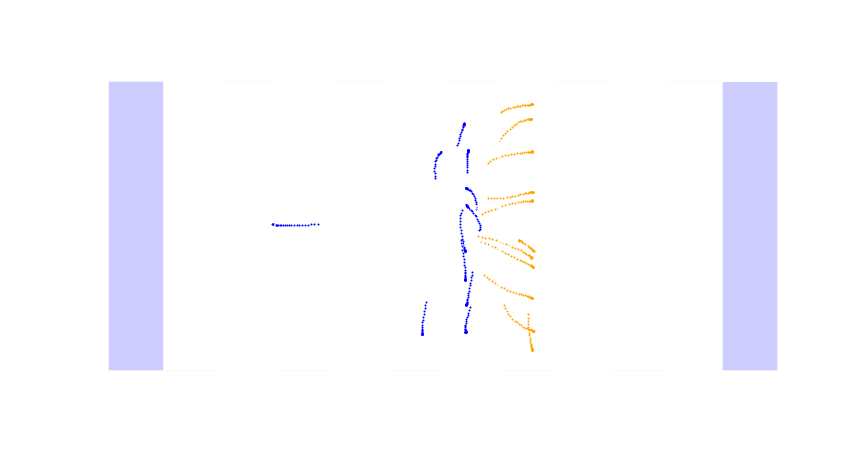

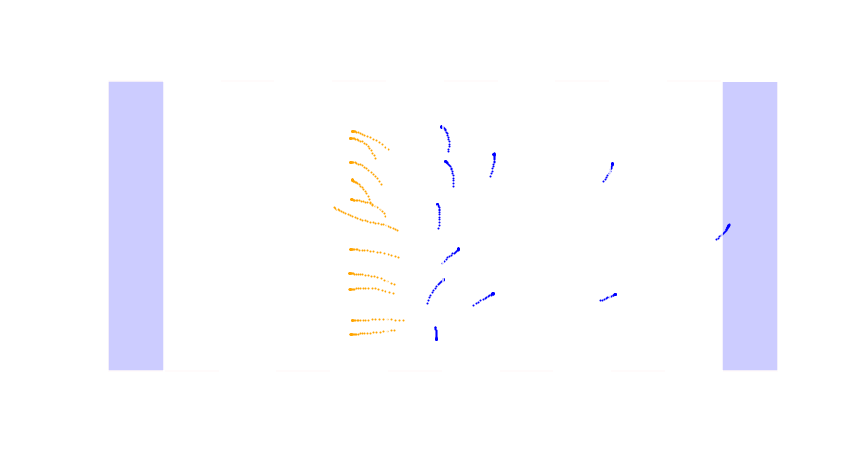

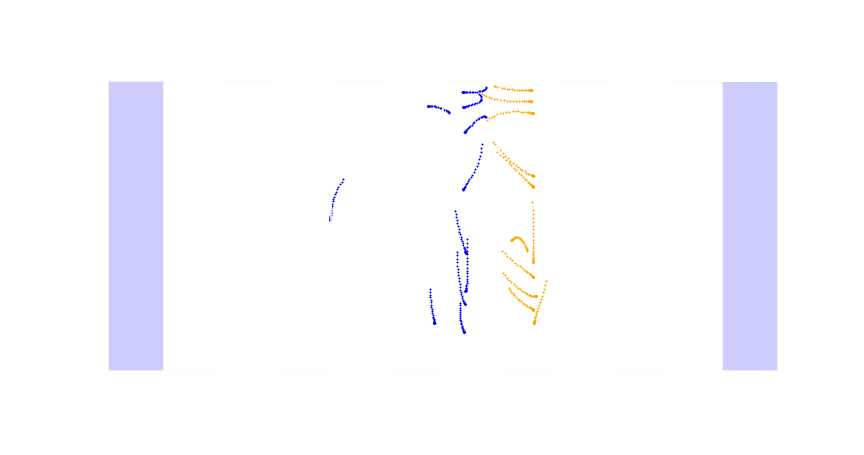

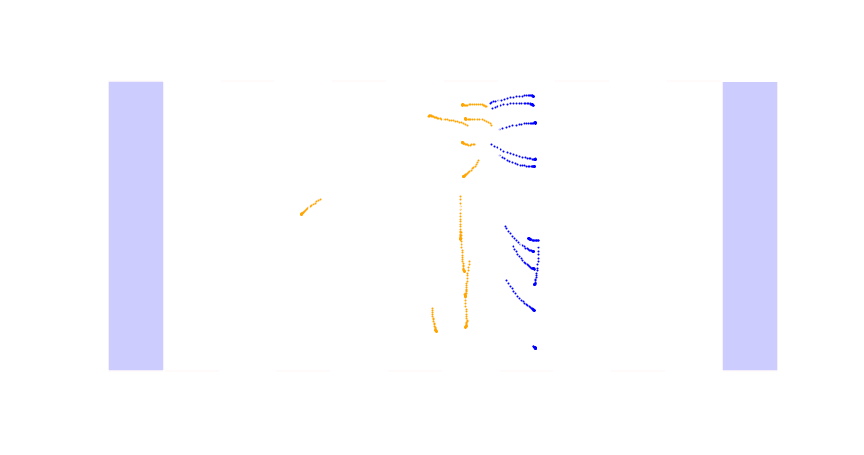

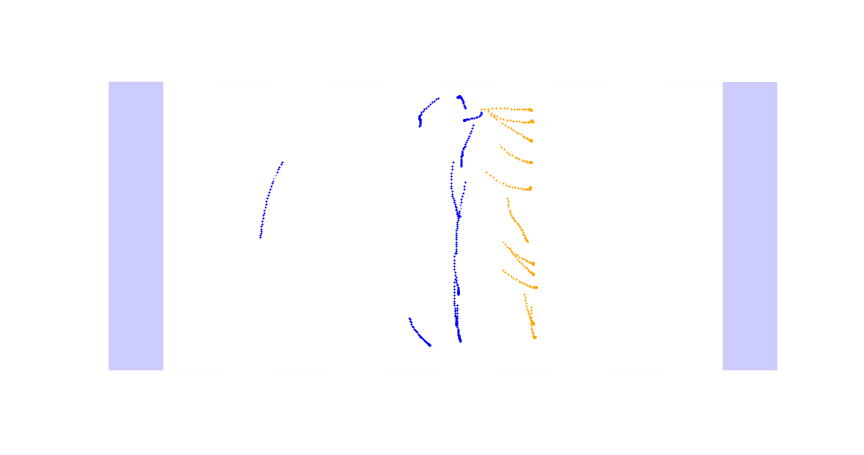

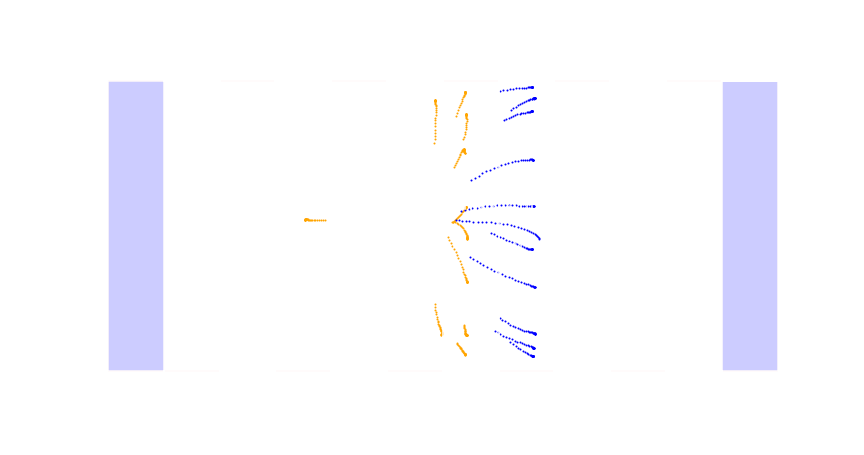

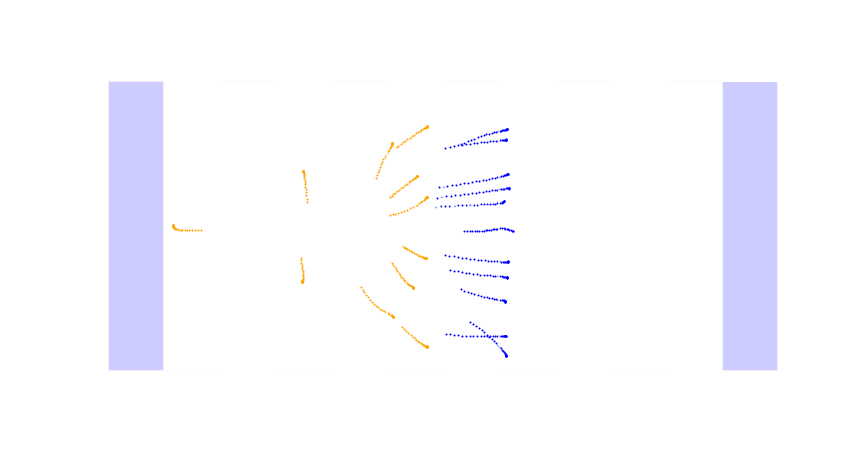

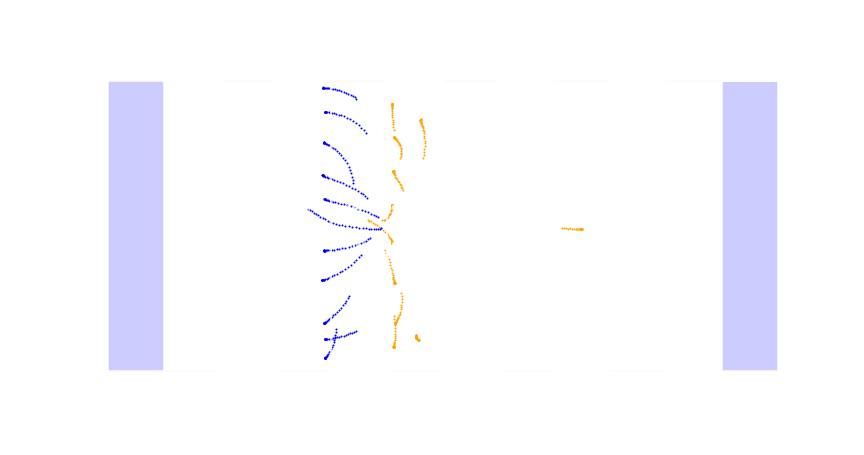

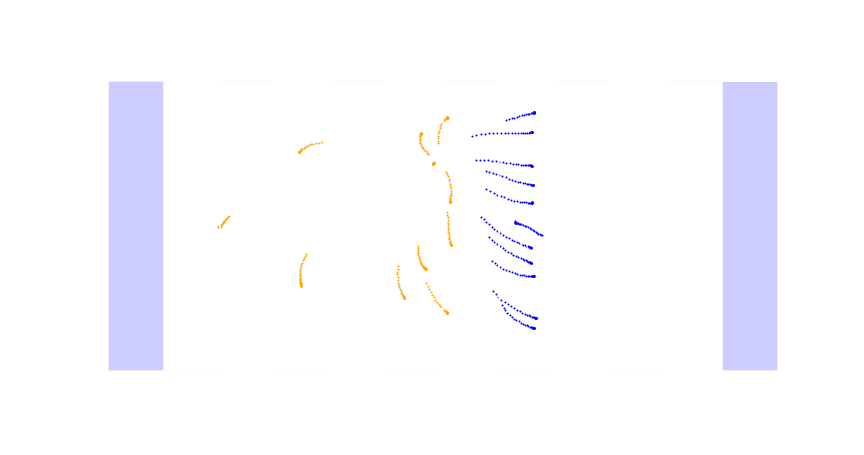

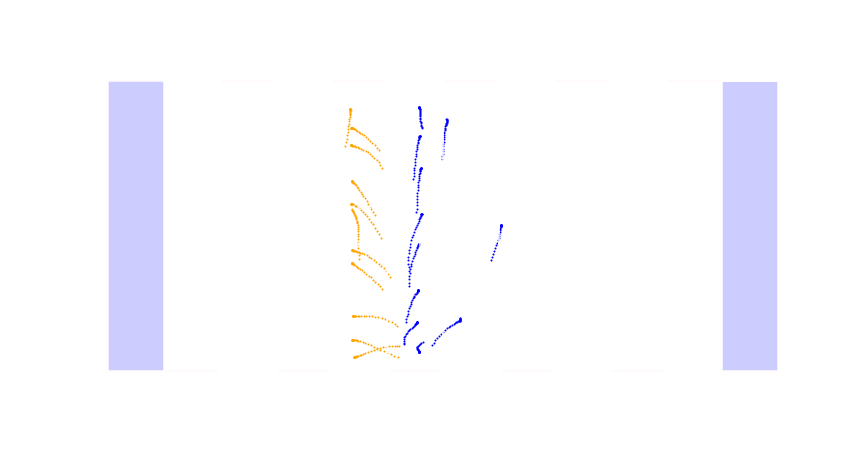

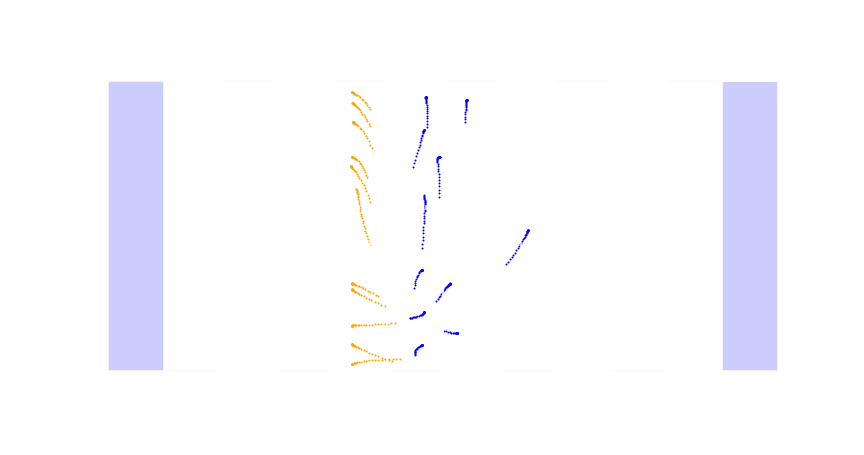

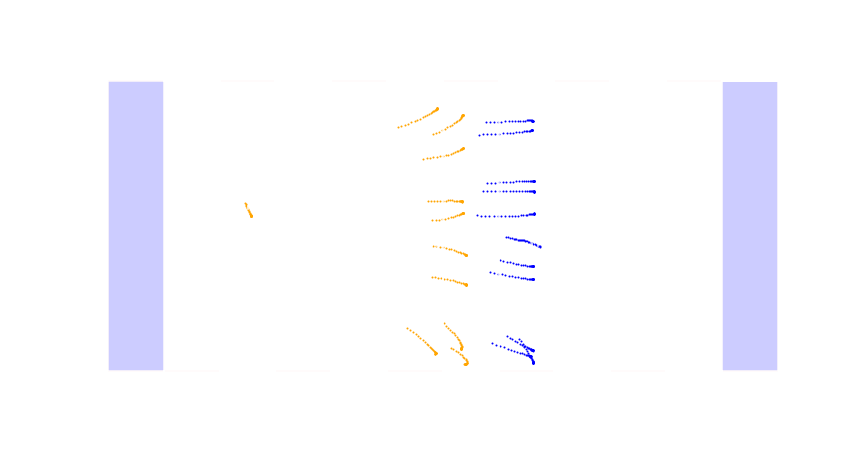

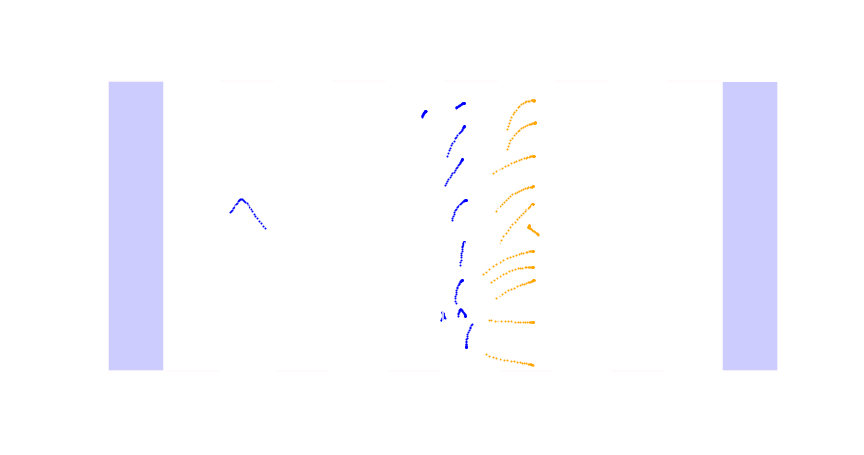

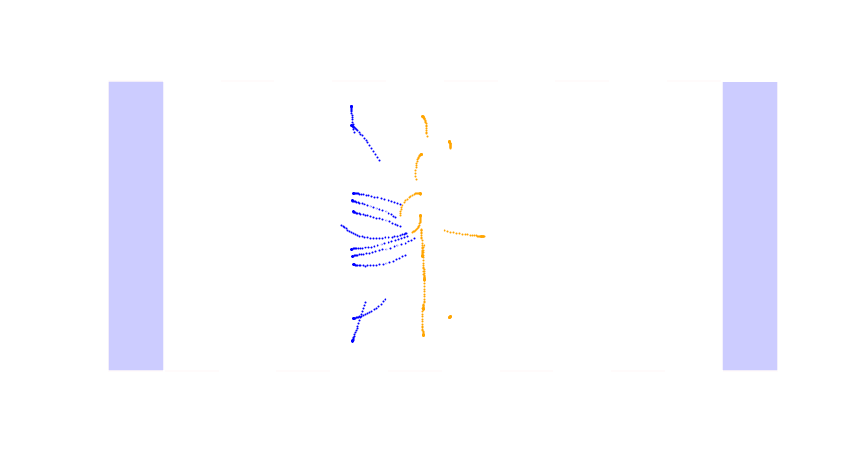

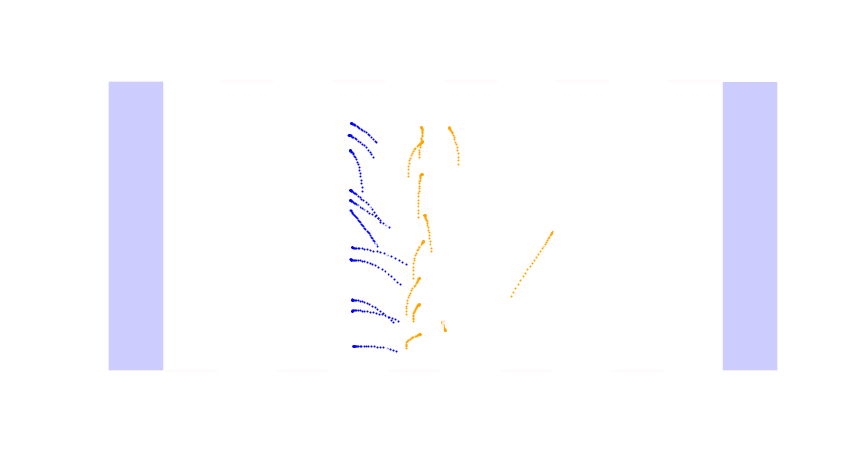

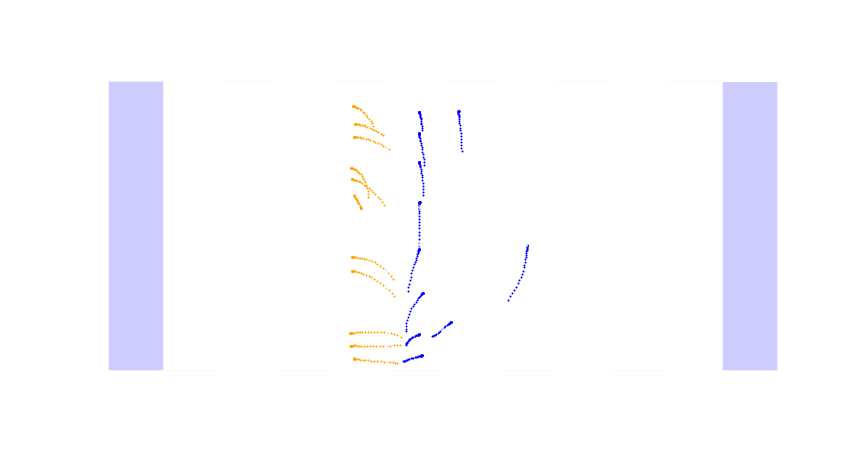

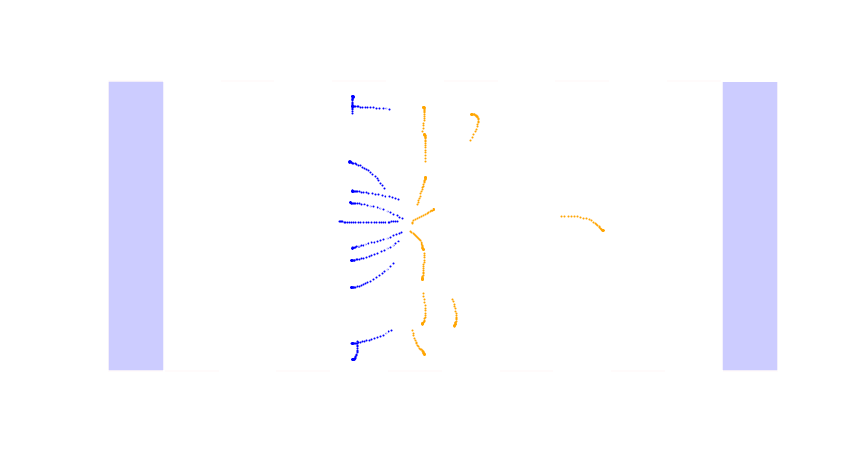

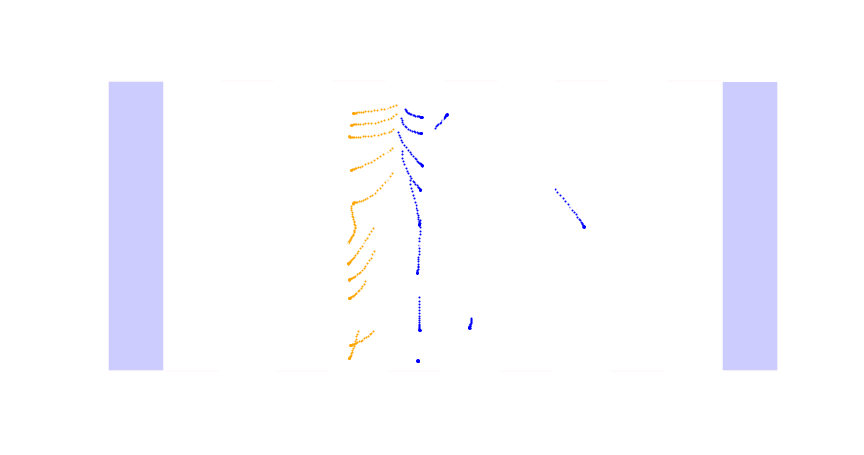

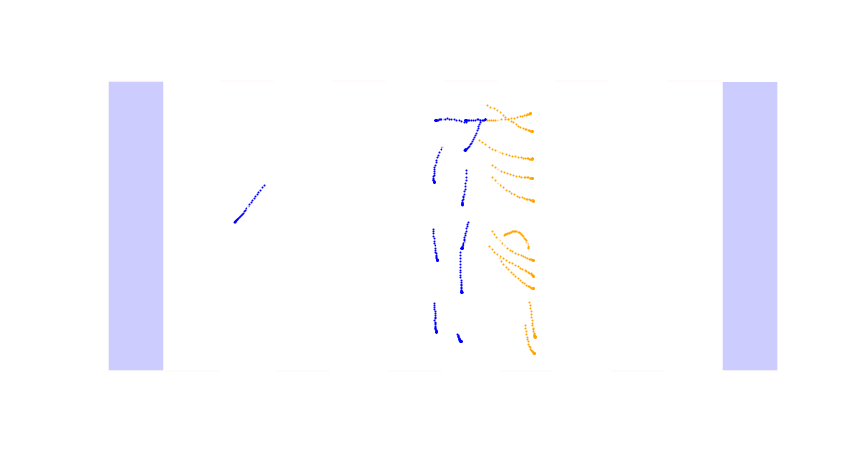

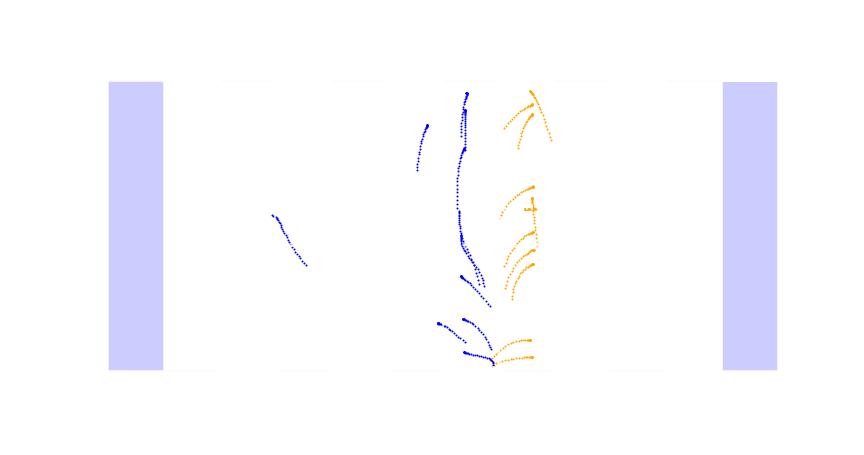

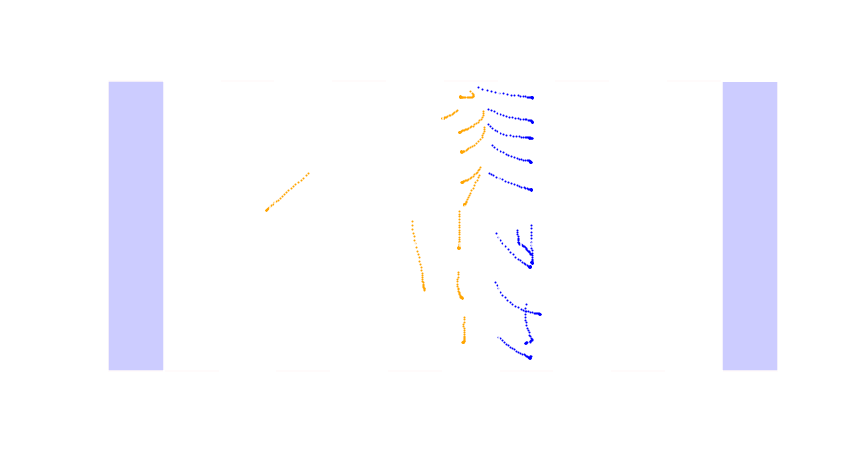

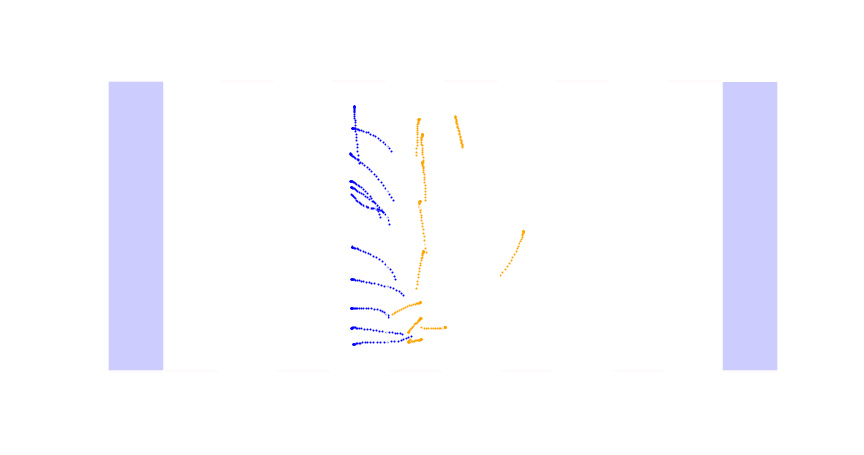

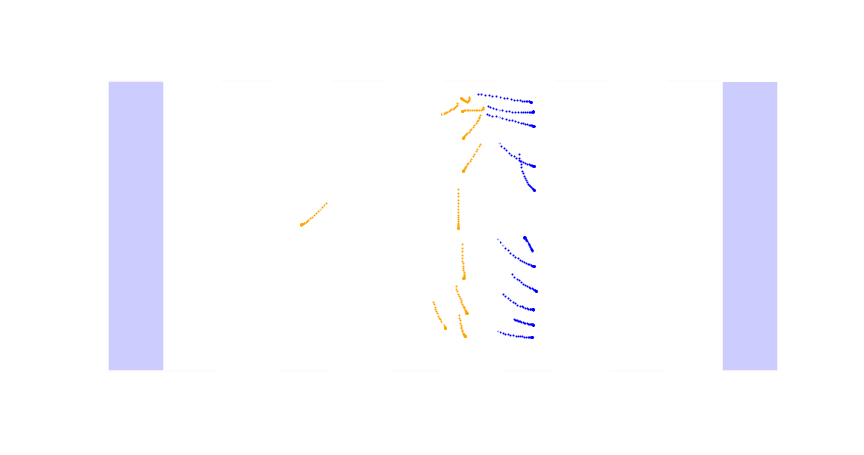

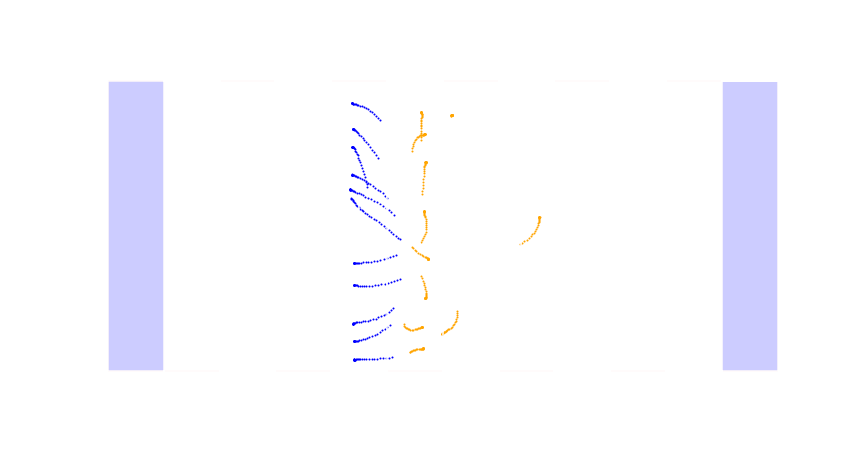

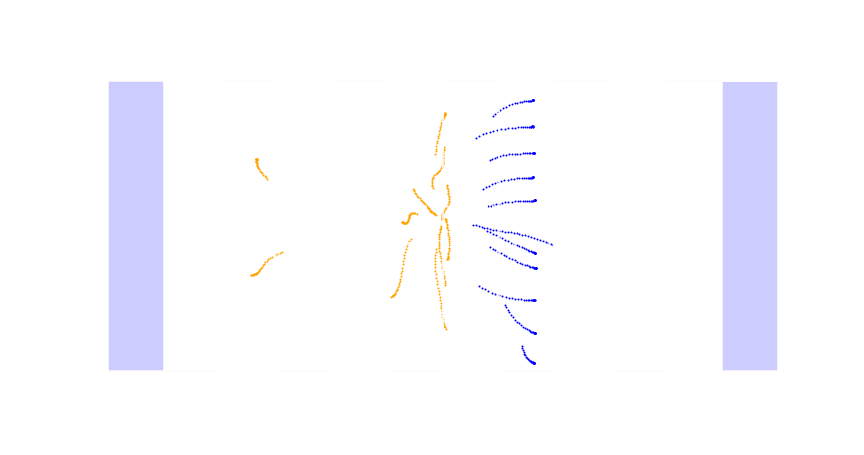

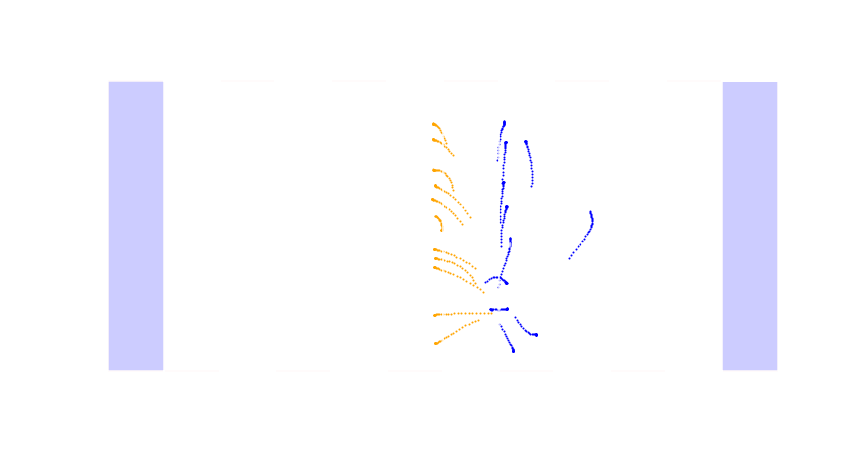

In [133]:
from PIL import Image

for i in df3_pos_corr_predicted['fname']:
    image = Image.open(data_path + 'kickoff_returns_v2_frame_sub30/' + i)
    image.show()

In [173]:
# check for onsides kicks
k = plays[plays['playDescription'].str.contains('onside')][['gameId', 'playId']]

In [208]:
k['fname'] = k['gameId'].astype(str) + "_" +  k['playId'].astype(str) + '.png'

In [203]:
for i in df3_pos_corr_predicted['fname']:
    if i in [str(file) for file in list(k['file'])]:
        df3_pos_corr_predicted['onsides'] = 1

In [211]:
pd.merge(df3_pos_corr_predicted, k, on=['fname'], how='left', indicator='Exist')

,fname,label,prediction,onsides,gameId,playId,file,Exist
0,2018100710_4640.png,1,1,1,2.018101e+09,4640.0,2018100710_4640.png,both
1,2021010315_4182.png,1,1,1,2.021010e+09,4182.0,2021010315_4182.png,both
2,2018123014_4253.png,1,1,1,2.018123e+09,4253.0,2018123014_4253.png,both
3,2018101406_4443.png,1,1,1,2.018101e+09,4443.0,2018101406_4443.png,both
4,2020110100_2624.png,1,1,1,2.020110e+09,2624.0,2020110100_2624.png,both
5,2020092009_2080.png,1,1,1,NaN,NaN,NaN,left_only
6,2018120202_4188.png,1,1,1,2.018120e+09,4188.0,2018120202_4188.png,both
7,2018123013_36.png,1,1,1,2.018123e+09,36.0,2018123013_36.png,both
8,2020121900_4262.png,1,1,1,2.020122e+09,4262.0,2020121900_4262.png,both
9,2019121509_4220.png,1,1,1,2.019122e+09,4220.0,2019121509_4220.png,both


In [201]:
for i in df3_pos_corr_predicted:
    if df3_pos_corr_predicted['fname'] in [str(file) for file in list(k['file'])]:
        df3_pos_corr_predicted['onsides'] = 1

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [204]:
pd.set_option('display.max_rows', None)

df3_pos_corr_predicted

,fname,label,prediction,onsides
1998,2018100710_4640.png,1,1,1
19978,2021010315_4182.png,1,1,1
6784,2018123014_4253.png,1,1,1
2306,2018101406_4443.png,1,1,1
16116,2020110100_2624.png,1,1,1
14064,2020092009_2080.png,1,1,1
4844,2018120202_4188.png,1,1,1
6734,2018123013_36.png,1,1,1
18770,2020121900_4262.png,1,1,1
12426,2019121509_4220.png,1,1,1


In [207]:
list(k['file'])

['2018090903_4162.png',
 '2018091601_4214.png',
 '2018091613_3464.png',
 '2018091613_3731.png',
 '2018091700_4233.png',
 '2018092303_3993.png',
 '2018092306_3813.png',
 '2018092307_3933.png',
 '2018100400_4630.png',
 '2018100704_4644.png',
 '2018100705_4021.png',
 '2018100706_3861.png',
 '2018100708_3388.png',
 '2018100709_3866.png',
 '2018100710_4640.png',
 '2018101406_4443.png',
 '2018101409_4249.png',
 '2018102100_3461.png',
 '2018102101_4147.png',
 '2018102200_4160.png',
 '2018102500_3136.png',
 '2018102805_4119.png',
 '2018102806_4252.png',
 '2018102811_3443.png',
 '2018102900_2694.png',
 '2018110401_4373.png',
 '2018110405_3539.png',
 '2018110408_3916.png',
 '2018111100_3659.png',
 '2018111100_3841.png',
 '2018111105_527.png',
 '2018111110_3192.png',
 '2018111802_4588.png',
 '2018111803_3993.png',
 '2018111805_3972.png',
 '2018112201_4254.png',
 '2018112202_4080.png',
 '2018112501_4757.png',
 '2018112510_3796.png',
 '2018120202_2771.png',
 '2018120202_4188.png',
 '2018120204_4105